4.3 Анализ данных в индустрии. Проект 1


1 задание

Для того чтобы отслеживать, как выглядит путь клиента от знакомства с продуктом до его получения, и какие в нем есть проблемные места, аналитики часто строят воронки. Этот инструмент позволяет понять, сколько клиентов "теряется" на каждом из этапов процесса и сколько в итоге совершает целевое действие.

Перед вами схема данных проекта Тинькофф квест. Постройте воронку, которая показывала бы в динамике по неделям и месяцам, сколько клиентов посещает наш сайт, и какая доля из них регистрируется на нем \ подает заявку на игру \ по факту приходит на нее. Количество клиентов и конверсии необходимо изобразить на одном графике.

Какие выводы можно сделать исходя из построенной воронки, какие точки роста продукта вы видите?

Задание нужно выполнить в JupyterNotebook \ Google Colab.

Как выполнять задание:

Подключиться к базе данных с помощью Python в JupyterNotebook \ Google Colab 
Собрать датасет с необходимыми полями,
Посчитать конверсии и сделать визуализацию на Python.
Прикрепить файл с выполненным заданием

In [33]:
#0. Подготовка
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2

In [34]:
#1.Подключаемся к базе данных
data = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA")


#1.Забираем данные
sql_week = """SELECT client.client_rk, account.account_rk, app.went_games_account, DATE_TRUNC('week', visit_dttm):: date AS week
FROM msu_analytics.client
LEFT JOIN msu_analytics.account ON client.client_rk = account.client_rk
LEFT JOIN(
    SELECT account_rk, SUM(game_flg) AS went_games_account
    FROM msu_analytics.Application
    LEFT JOIN msu_analytics.Game ON msu_analytics.Application.Game_rk=msu_analytics.Game.Game_rk
    GROUP BY account_rk
) AS app ON account.account_rk = app.account_rk """

info_week = pd.read_sql(sql_week, data)

sql_month = """SELECT client.client_rk, account.account_rk, app.went_games_account, DATE_TRUNC('month', visit_dttm):: date AS month
FROM msu_analytics.client
LEFT JOIN msu_analytics.account ON client.client_rk = account.client_rk
LEFT JOIN(
    SELECT account_rk, SUM(game_flg) AS went_games_account
    FROM msu_analytics.Application
    LEFT JOIN msu_analytics.Game ON msu_analytics.Application.Game_rk=msu_analytics.Game.Game_rk
    GROUP BY account_rk
) AS app ON account.account_rk = app.account_rk """

info_month = pd.read_sql(sql_month, data)
#info_week.head()
#info_month.head()

#Преобразуем данные
df_week = info_week.groupby('week').agg(
    attendence=('client_rk', lambda x: x.notnull().sum()),
    registrated=('account_rk', lambda x: x.notnull().sum()), 
    zayavka=('went_games_account', lambda x: x.notnull().sum()), 
    prishli=('went_games_account', lambda x: (x > 0).sum())
).reset_index()

df_month = info_month.groupby('month').agg(
    attendence=('client_rk', lambda x: x.notnull().sum()),
    registrated=('account_rk', lambda x: x.notnull().sum()), 
    zayavka=('went_games_account', lambda x: x.notnull().sum()), 
    prishli=('went_games_account', lambda x: (x > 0).sum())
).reset_index()
#df_week.head()
#df_month.head()
#info_week.head()


c:\Users\natas\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\natas\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<Figure size 576x576 with 0 Axes>

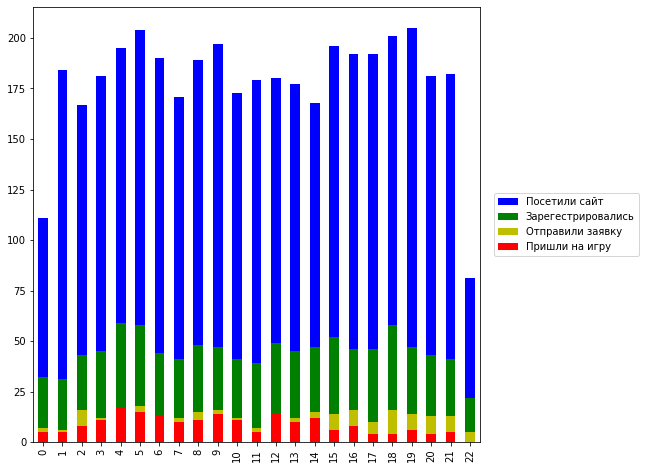

In [35]:
#График по неделям
figsize = (8, 8)
plt.figure(figsize=figsize)
_, ax = plt.subplots()
df_week["attendence"].plot(kind='bar', ax=ax, color='b', figsize=figsize)
df_week["registrated"].plot(kind='bar', ax=ax, color='g', figsize=figsize)
df_week["zayavka"].plot(kind='bar', ax=ax, color='y', figsize=figsize)
df_week["prishli"].plot(kind='bar', ax=ax, color='r', figsize=figsize)
plt.legend(['Посетили сайт', 'Зарегистрировались', 'Отправили заявку', 'Пришли на игру'],
           loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.show()


<Figure size 576x576 with 0 Axes>

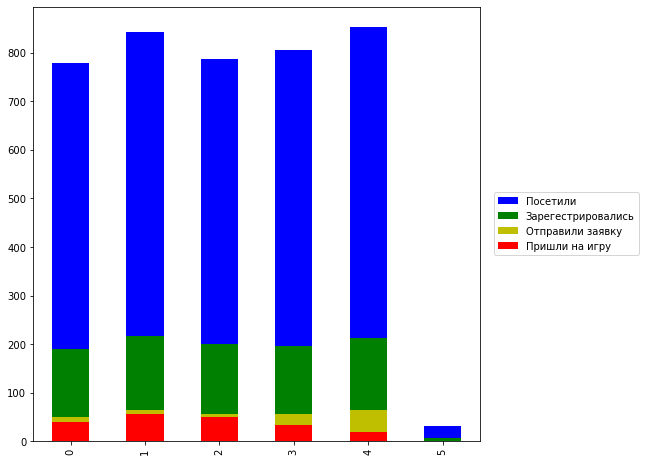

In [37]:
#График по месяцам
figsize = (8, 8)
plt.figure(figsize=figsize)
_, ax = plt.subplots()
df_month["attendence"].plot(kind='bar', ax=ax, color='b', figsize=figsize)
df_month["registrated"].plot(kind='bar', ax=ax, color='g', figsize=figsize)
df_month["zayavka"].plot(kind='bar', ax=ax, color='y', figsize=figsize)
df_month["prishli"].plot(kind='bar', ax=ax, color='r', figsize=figsize)
plt.legend(['Посетили', 'Зарегистрировались', 'Отправили заявку',
           'Пришли на игру'], loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.show()

Вывод : 

1) В месяц примерно одинаковое количество людей посещают сайт, регистрируются и оставляют заявку на игру.
2) Первые 3 месяца на игру приходили большинство зарегистрировавшихся(>80%).С каждым месяцем на игру из зарегистрировавшихся приходит все меньше людей(60%, 30%).
3) Регистрируется на сайте примерно четверть пришедших, и только четверть от них оставляет заявку.


Необходимо поднять количество регистраций на сайте, возможные решения: 
Улучшение UX/UI, качества контента, ускорение загрузки страниц, использовать соцсети для привлечения пользователей, возможно бонус за регистрацию.
Наблюдается отрицательная динамика по количеству пришедших на игру после регистрации, возможное решение: вознаграждать прошедших игру за отзывы об игре, чтобы зарегистрировшиеся увидели, что многим понравилось, и у них будет меньше страха потерять время на что-то неинтересное.